In [1]:
# importing basic modules
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sn
from tqdm import tqdm
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm

In [2]:
results_folderpath = "/lustre/bio_running/DNA_Ribo_random_2023/results/currents_features_with_raw_data_final"

### rC rep1


#########################
CTRL_1 vs CTRL_2

#########################
CTRL_1 vs rC_random400_1

#########################
CTRL_1 vs rC_random600_1

#########################
CTRL_1 vs rC_random800_1

      position  dwell_sum_of_abs_deltas strand                comparison
0         4722                 0.014075      +          CTRL_1_vs_CTRL_2
1         4820                 0.017678      +          CTRL_1_vs_CTRL_2
2         4832                 0.030663      +          CTRL_1_vs_CTRL_2
3         4833                 0.013578      +          CTRL_1_vs_CTRL_2
4         4729                 0.014536      +          CTRL_1_vs_CTRL_2
...        ...                      ...    ...                       ...
4131      4536                 0.018368      -  CTRL_1_vs_rC_random800_1
4132      5048                 0.031198      -  CTRL_1_vs_rC_random800_1
4133      5049                 0.040052      -  CTRL_1_vs_rC_random800_1
4134      5050                 0.026434      -  CTRL_1_vs_rC_random80

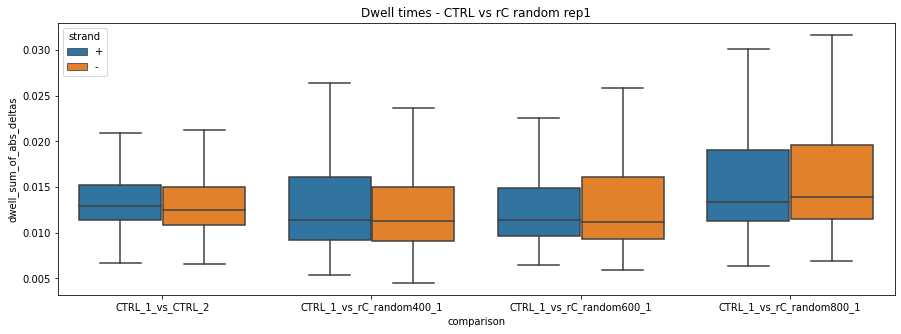

In [3]:
# load diffs
diffs_total = []
for s in ["CTRL_2"] + [f"rC_random{conc}_1" for conc in [400,600,800]]:
#for s in [f"rC_random{conc}_1" for conc in [400]]:
    dna_sample_name = "CTRL_1"
    ribo_sample_name = s
    comparison = f"{dna_sample_name} vs {ribo_sample_name}"
    print("\n#########################")
    print(comparison)
    # load diffs
    diffs_filepath = os.path.join(results_folderpath, f"dwelltimes_sum_of_diffs_{ribo_sample_name}_vs_{dna_sample_name}.tsv")
    diffs = pd.read_table(diffs_filepath, index_col=0)
    diffs_total.append(diffs)

# concat diffs total
diffs_total = pd.concat(diffs_total, ignore_index=True)

# print stats
print()
print(diffs_total)
print()
print(diffs_total.groupby(by=["comparison", "strand"]).describe()["dwell_sum_of_abs_deltas"])
# save to disk
diffs_total.groupby(by=["comparison", "strand"]).describe()["dwell_sum_of_abs_deltas"].to_csv(os.path.join(results_folderpath, f"dwelltimes_sum_of_diffs_whole_stats_rC_rep1.tsv"), sep="\t")

plt.figure(figsize=(15,5))
sn.boxplot(data=diffs_total, y="dwell_sum_of_abs_deltas", x="comparison", hue="strand", showfliers=False)

title = f"Dwell times - CTRL vs rC random rep1"
plt.title(title)

# save fig
save_path = os.path.join(results_folderpath, f"dwelltimes_sum_of_diffs_whole_stats_rC_rep1.tiff")
plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white', transparent=False)

plt.show()

In [4]:
diffs_total

,position,dwell_sum_of_abs_deltas,strand,comparison
0,4722,0.014075,+,CTRL_1_vs_CTRL_2
1,4820,0.017678,+,CTRL_1_vs_CTRL_2
2,4832,0.030663,+,CTRL_1_vs_CTRL_2
3,4833,0.013578,+,CTRL_1_vs_CTRL_2
4,4729,0.014536,+,CTRL_1_vs_CTRL_2
...,...,...,...,...
4131,4536,0.018368,-,CTRL_1_vs_rC_random800_1
4132,5048,0.031198,-,CTRL_1_vs_rC_random800_1
4133,5049,0.040052,-,CTRL_1_vs_rC_random800_1
4134,5050,0.026434,-,CTRL_1_vs_rC_random800_1


In [5]:
# perform two-way ANOVA
formula = f'dwell_sum_of_abs_deltas ~  C(comparison) + C(strand) + C(comparison):C(strand)'
model = sm.ols(formula, data=diffs_total).fit()
table = anova_lm(model, typ=2)
print(table)

                               sum_sq      df          F        PR(>F)
C(comparison)            8.585318e-03     3.0  15.107611  8.891872e-10
C(strand)                6.133818e-10     1.0   0.000003  9.985643e-01
C(comparison):C(strand)  1.872409e-03     3.0   3.294884  1.966782e-02
Residual                 7.819501e-01  4128.0        NaN           NaN


Saving figure to: /lustre/bio_running/DNA_Ribo_random_2023/results/currents_features_with_raw_data_final/LINEPLOT_DIFF_DWELLTIMES_rC_rep1_OVER_GEN_POS_27112023_CTRL_1_vs_CTRL_2.tiff


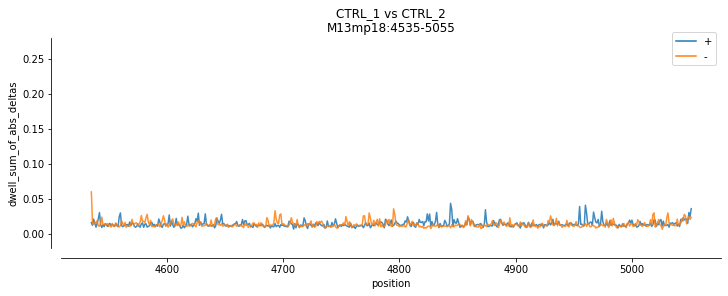

Saving figure to: /lustre/bio_running/DNA_Ribo_random_2023/results/currents_features_with_raw_data_final/LINEPLOT_DIFF_DWELLTIMES_rC_rep1_OVER_GEN_POS_27112023_CTRL_1_vs_rC_random400_1.tiff


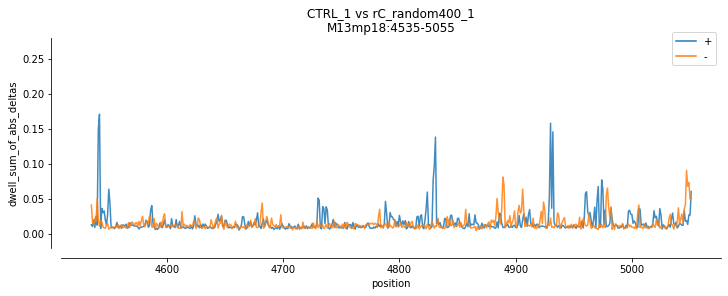

Saving figure to: /lustre/bio_running/DNA_Ribo_random_2023/results/currents_features_with_raw_data_final/LINEPLOT_DIFF_DWELLTIMES_rC_rep1_OVER_GEN_POS_27112023_CTRL_1_vs_rC_random600_1.tiff


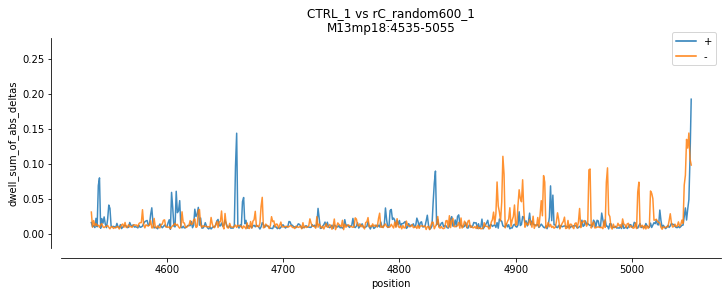

Saving figure to: /lustre/bio_running/DNA_Ribo_random_2023/results/currents_features_with_raw_data_final/LINEPLOT_DIFF_DWELLTIMES_rC_rep1_OVER_GEN_POS_27112023_CTRL_1_vs_rC_random800_1.tiff


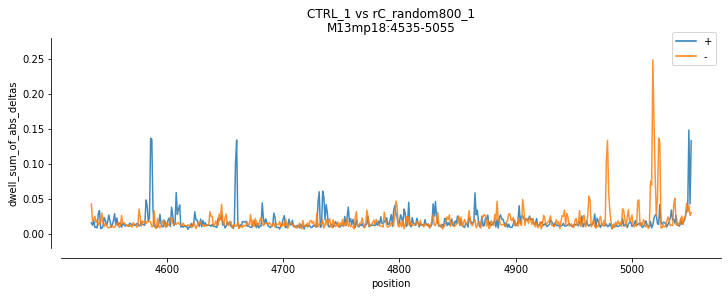

In [6]:
# plot over positions
for comp in diffs_total.comparison.value_counts().index:
    title = " vs ".join(comp.split("_vs_")) + "\nM13mp18:4535-5055"
    # create a subplot for each site
    f, axes = plt.subplots(1, figsize=(10,4), constrained_layout=True)
    sn.lineplot(data=diffs_total.query(f"comparison == '{comp}'"), x="position", y="dwell_sum_of_abs_deltas", hue="strand", ax=axes, alpha=0.85)
    axes.set_ylim(-0.02, 0.28)
    # Move left and bottom spines outward by 10 points
    axes.spines.left.set_position(('outward', 10))
    axes.spines.bottom.set_position(('outward', 10))
    # Hide the right and top spines
    axes.spines.right.set_visible(False)
    axes.spines.top.set_visible(False)
    # Only show ticks on the left and bottom spines
    axes.yaxis.set_ticks_position('left')
    axes.xaxis.set_ticks_position('bottom')
    axes.set_title(title)

    axes.legend(bbox_to_anchor=(1.,1.05))
    
    # save image to disk
    save_path = os.path.join(results_folderpath, f"LINEPLOT_DIFF_DWELLTIMES_rC_rep1_OVER_GEN_POS_27112023_{comp}.tiff")
    print(f"Saving figure to: {save_path}")
    plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white', transparent=False)
    
    plt.show()

In [7]:
diffs_total_stats = diffs_total.groupby(by=["comparison", "strand"]).describe()["dwell_sum_of_abs_deltas"].reset_index()
diffs_total_stats

,comparison,strand,count,mean,std,min,25%,50%,75%,max
0,CTRL_1_vs_CTRL_2,+,517.0,0.014148,0.004837,0.006675,0.011421,0.012962,0.015247,0.043598
1,CTRL_1_vs_CTRL_2,-,517.0,0.013789,0.004801,0.006572,0.010897,0.012477,0.015061,0.059841
2,CTRL_1_vs_rC_random400_1,+,517.0,0.016548,0.017366,0.005393,0.009261,0.011354,0.016117,0.170835
3,CTRL_1_vs_rC_random400_1,-,517.0,0.014529,0.010362,0.004551,0.009124,0.011243,0.015055,0.090582
4,CTRL_1_vs_rC_random600_1,+,517.0,0.015172,0.014745,0.006445,0.009626,0.011382,0.014854,0.192294
5,CTRL_1_vs_rC_random600_1,-,517.0,0.016682,0.017238,0.005939,0.009368,0.011154,0.016104,0.143944
6,CTRL_1_vs_rC_random800_1,+,517.0,0.017574,0.014942,0.006387,0.011268,0.013385,0.019059,0.148231
7,CTRL_1_vs_rC_random800_1,-,517.0,0.018444,0.017950,0.006862,0.011474,0.013863,0.019602,0.248584


In [8]:
concs = []
for c in diffs_total_stats.comparison:
    if "random" in c:
        concs.append(int(c.split("random")[1].split("_")[0]))
    else:
        concs.append(0)
diffs_total_stats["conc"] = concs
diffs_total_stats

,comparison,strand,count,mean,std,min,25%,50%,75%,max,conc
0,CTRL_1_vs_CTRL_2,+,517.0,0.014148,0.004837,0.006675,0.011421,0.012962,0.015247,0.043598,0
1,CTRL_1_vs_CTRL_2,-,517.0,0.013789,0.004801,0.006572,0.010897,0.012477,0.015061,0.059841,0
2,CTRL_1_vs_rC_random400_1,+,517.0,0.016548,0.017366,0.005393,0.009261,0.011354,0.016117,0.170835,400
3,CTRL_1_vs_rC_random400_1,-,517.0,0.014529,0.010362,0.004551,0.009124,0.011243,0.015055,0.090582,400
4,CTRL_1_vs_rC_random600_1,+,517.0,0.015172,0.014745,0.006445,0.009626,0.011382,0.014854,0.192294,600
5,CTRL_1_vs_rC_random600_1,-,517.0,0.016682,0.017238,0.005939,0.009368,0.011154,0.016104,0.143944,600
6,CTRL_1_vs_rC_random800_1,+,517.0,0.017574,0.014942,0.006387,0.011268,0.013385,0.019059,0.148231,800
7,CTRL_1_vs_rC_random800_1,-,517.0,0.018444,0.017950,0.006862,0.011474,0.013863,0.019602,0.248584,800


Pearson correlation stat, p: (0.8660147713843169, 0.005425196417483365)
Spearman correlation stat, p: SpearmanrResult(correlation=0.9271050693011065, pvalue=0.0009161801973082118)
Saving figure to: /lustre/bio_running/DNA_Ribo_random_2023/results/currents_features_with_raw_data_final/CORRELATION_DWELL_TIMES_rC_random_1.whole.tiff


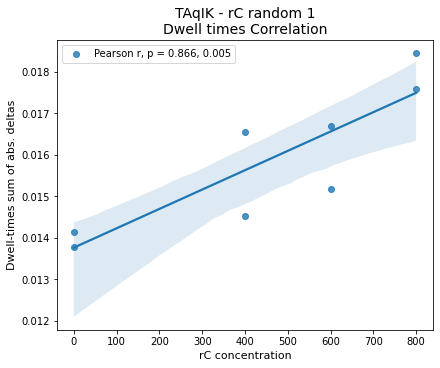

In [9]:
# compute correlations
from scipy.stats import pearsonr, spearmanr
print(f'Pearson correlation stat, p: { pearsonr(diffs_total_stats["mean"].values, diffs_total_stats["conc"].values) }' )
print(f'Spearman correlation stat, p: { spearmanr(diffs_total_stats["mean"].values, diffs_total_stats["conc"].values) }' )

# produce plots
# plot correlation
r,p = pearsonr( diffs_total_stats["mean"], diffs_total_stats["conc"] )
f, axes = plt.subplots(1, figsize=(6,5), constrained_layout=True)
sn.regplot(data=diffs_total_stats, x="conc", y="mean", ax=axes, label=f'Pearson r, p = {r:.3f}, {p:.3f}')
axes.set_title("TAqIK - rC random 1\nDwell times Correlation", fontsize=14)
axes.set_ylabel("Dwell-times sum of abs. deltas", fontsize=11)
axes.set_xlabel("rC concentration", fontsize=11)
axes.legend()

# save image to disk
save_path = os.path.join(results_folderpath, f"CORRELATION_DWELL_TIMES_rC_random_1.whole.tiff")
print(f"Saving figure to: {save_path}")
plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white', transparent=False)

plt.show()

In [10]:
diffs_total_stats

,comparison,strand,count,mean,std,min,25%,50%,75%,max,conc
0,CTRL_1_vs_CTRL_2,+,517.0,0.014148,0.004837,0.006675,0.011421,0.012962,0.015247,0.043598,0
1,CTRL_1_vs_CTRL_2,-,517.0,0.013789,0.004801,0.006572,0.010897,0.012477,0.015061,0.059841,0
2,CTRL_1_vs_rC_random400_1,+,517.0,0.016548,0.017366,0.005393,0.009261,0.011354,0.016117,0.170835,400
3,CTRL_1_vs_rC_random400_1,-,517.0,0.014529,0.010362,0.004551,0.009124,0.011243,0.015055,0.090582,400
4,CTRL_1_vs_rC_random600_1,+,517.0,0.015172,0.014745,0.006445,0.009626,0.011382,0.014854,0.192294,600
5,CTRL_1_vs_rC_random600_1,-,517.0,0.016682,0.017238,0.005939,0.009368,0.011154,0.016104,0.143944,600
6,CTRL_1_vs_rC_random800_1,+,517.0,0.017574,0.014942,0.006387,0.011268,0.013385,0.019059,0.148231,800
7,CTRL_1_vs_rC_random800_1,-,517.0,0.018444,0.017950,0.006862,0.011474,0.013863,0.019602,0.248584,800


In [11]:
# calculate indexes (take all values above Mean+2SD, outliers..)
outliers = []
for c in diffs_total.itertuples():
    comparison = c.comparison
    strand = c.strand
    error = c.dwell_sum_of_abs_deltas
    # retrieve mean and STD_dev
    mean = diffs_total_stats.query(f"comparison == '{c.comparison}'").query(f"strand == '{c.strand}'")["mean"].values[0]
    std = diffs_total_stats.query(f"comparison == '{c.comparison}'").query(f"strand == '{c.strand}'")["std"].values[0]
    outliers.append(error > (mean+2*std))
    #print(comparison, strand, "-->", mean, "+/-", std, " - Outlier?", error > (mean+2*std))
diffs_total["outlier"] = outliers
diffs_total

,position,dwell_sum_of_abs_deltas,strand,comparison,outlier
0,4722,0.014075,+,CTRL_1_vs_CTRL_2,False
1,4820,0.017678,+,CTRL_1_vs_CTRL_2,False
2,4832,0.030663,+,CTRL_1_vs_CTRL_2,True
3,4833,0.013578,+,CTRL_1_vs_CTRL_2,False
4,4729,0.014536,+,CTRL_1_vs_CTRL_2,False
...,...,...,...,...,...
4131,4536,0.018368,-,CTRL_1_vs_rC_random800_1,False
4132,5048,0.031198,-,CTRL_1_vs_rC_random800_1,False
4133,5049,0.040052,-,CTRL_1_vs_rC_random800_1,False
4134,5050,0.026434,-,CTRL_1_vs_rC_random800_1,False


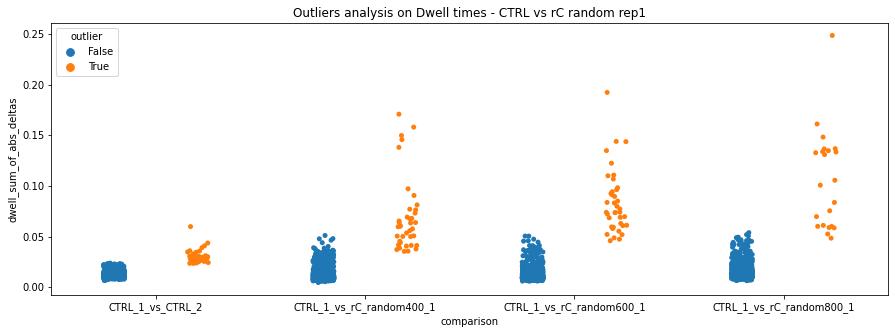

In [12]:
# works only on outliers measurements
plt.figure(figsize=(15,5))
sn.stripplot(data=diffs_total, x="comparison", y="dwell_sum_of_abs_deltas", hue="outlier", dodge=True)
plt.title(f"Outliers analysis on Dwell times - CTRL vs rC random rep1")
# save fig
save_path = os.path.join(results_folderpath, f"dwelltimes_sum_of_diffs_whole_stats_rC_outliers_rep1.tiff")
plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white', transparent=False)

plt.show()

In [13]:
print("STATS of the above plot:")
stats = diffs_total.groupby(by=["comparison", "outlier"]).describe()["dwell_sum_of_abs_deltas"].copy().reset_index()
stats

STATS of the above plot:


,comparison,outlier,count,mean,std,min,25%,50%,75%,max
0,CTRL_1_vs_CTRL_2,False,987.0,0.013220,0.003176,0.006572,0.011027,0.012599,0.014704,0.023702
1,CTRL_1_vs_CTRL_2,True,47.0,0.029698,0.006381,0.023438,0.025704,0.028196,0.030550,0.059841
2,CTRL_1_vs_rC_random400_1,False,995.0,0.013429,0.006796,0.004551,0.009100,0.011152,0.014838,0.051017
3,CTRL_1_vs_rC_random400_1,True,39.0,0.069359,0.035819,0.035349,0.044650,0.060052,0.074701,0.170835
4,CTRL_1_vs_rC_random600_1,False,995.0,0.013262,0.006477,0.005939,0.009384,0.011110,0.014720,0.050421
5,CTRL_1_vs_rC_random600_1,True,39.0,0.083909,0.031248,0.045842,0.060925,0.074027,0.095273,0.192294
6,CTRL_1_vs_rC_random800_1,False,1012.0,0.016097,0.007526,0.006387,0.011300,0.013502,0.018867,0.053846
7,CTRL_1_vs_rC_random800_1,True,22.0,0.105980,0.048999,0.048396,0.060293,0.103145,0.134576,0.248584


In [14]:
# compute correlations with means
print("Correlations on normal values (not outlier):")
print(f'Pearson correlation stat, p: { pearsonr(diffs_total.query("outlier == False").groupby(by=["comparison"]).describe()["dwell_sum_of_abs_deltas"]["mean"].values, [0,400,600,800]) }' )
print(f'Spearman correlation stat, p: { spearmanr(diffs_total.query("outlier == False").groupby(by=["comparison"]).describe()["dwell_sum_of_abs_deltas"]["mean"], [0,400,600,800]) }' )
print("Correlations on outlier values:")
print(f'Pearson correlation stat, p: { pearsonr(diffs_total.query("outlier == True").groupby(by=["comparison"]).describe()["dwell_sum_of_abs_deltas"]["mean"].values, [0,400,600,800]) }' )
print(f'Spearman correlation stat, p: { spearmanr(diffs_total.query("outlier == True").groupby(by=["comparison"]).describe()["dwell_sum_of_abs_deltas"]["mean"], [0,400,600,800]) }' )

Correlations on normal values (not outlier):
Pearson correlation stat, p: (0.699367574122672, 0.30063242587732797)
Spearman correlation stat, p: SpearmanrResult(correlation=0.7999999999999999, pvalue=0.20000000000000007)
Correlations on outlier values:
Pearson correlation stat, p: (0.9983858637106213, 0.001614136289378676)
Spearman correlation stat, p: SpearmanrResult(correlation=1.0, pvalue=0.0)


In [15]:
diffs_total

,position,dwell_sum_of_abs_deltas,strand,comparison,outlier
0,4722,0.014075,+,CTRL_1_vs_CTRL_2,False
1,4820,0.017678,+,CTRL_1_vs_CTRL_2,False
2,4832,0.030663,+,CTRL_1_vs_CTRL_2,True
3,4833,0.013578,+,CTRL_1_vs_CTRL_2,False
4,4729,0.014536,+,CTRL_1_vs_CTRL_2,False
...,...,...,...,...,...
4131,4536,0.018368,-,CTRL_1_vs_rC_random800_1,False
4132,5048,0.031198,-,CTRL_1_vs_rC_random800_1,False
4133,5049,0.040052,-,CTRL_1_vs_rC_random800_1,False
4134,5050,0.026434,-,CTRL_1_vs_rC_random800_1,False


In [16]:
# perform two-way ANOVA
formula = f'dwell_sum_of_abs_deltas ~  C(comparison) + C(outlier) + C(comparison):C(outlier)'
model = sm.ols(formula, data=diffs_total).fit()
table = anova_lm(model, typ=2)
print(table)

                            sum_sq      df            F         PR(>F)
C(comparison)             0.014862     3.0    69.799904   4.999895e-44
C(outlier)                0.389740     1.0  5491.382971   0.000000e+00
C(comparison):C(outlier)  0.101106     3.0   474.857630  4.627389e-265
Residual                  0.292976  4128.0          NaN            NaN


In [17]:
# compute sums related to outliers as index to calculate correlation with concentrations
sums_indexes = diffs_total.query("outlier == True").groupby("comparison").sum()[["dwell_sum_of_abs_deltas", "outlier"]]
sums_indexes.columns = ["outlier_index", "outliers_count"]
sums_indexes

,outlier_index,outliers_count
comparison,,
CTRL_1_vs_CTRL_2,1.395794,47
CTRL_1_vs_rC_random400_1,2.705017,39
CTRL_1_vs_rC_random600_1,3.272457,39
CTRL_1_vs_rC_random800_1,2.331565,22


In [18]:
print(f'Pearson correlation stat, p: { pearsonr(sums_indexes["outlier_index"].values, [0,400,600,800]) }' )
print(f'Spearman correlation stat, p: { spearmanr(sums_indexes["outlier_index"].values, [0,400,600,800]) }' )

Pearson correlation stat, p: (0.6728546170598787, 0.3271453829401213)
Spearman correlation stat, p: SpearmanrResult(correlation=0.39999999999999997, pvalue=0.6)


In [19]:
diffs

,position,dwell_sum_of_abs_deltas,strand,comparison
0,4722,0.011691,+,CTRL_1_vs_rC_random800_1
1,4820,0.012918,+,CTRL_1_vs_rC_random800_1
2,4832,0.022821,+,CTRL_1_vs_rC_random800_1
3,4833,0.016027,+,CTRL_1_vs_rC_random800_1
4,4807,0.013248,+,CTRL_1_vs_rC_random800_1
...,...,...,...,...
1029,4536,0.018368,-,CTRL_1_vs_rC_random800_1
1030,5048,0.031198,-,CTRL_1_vs_rC_random800_1
1031,5049,0.040052,-,CTRL_1_vs_rC_random800_1
1032,5050,0.026434,-,CTRL_1_vs_rC_random800_1


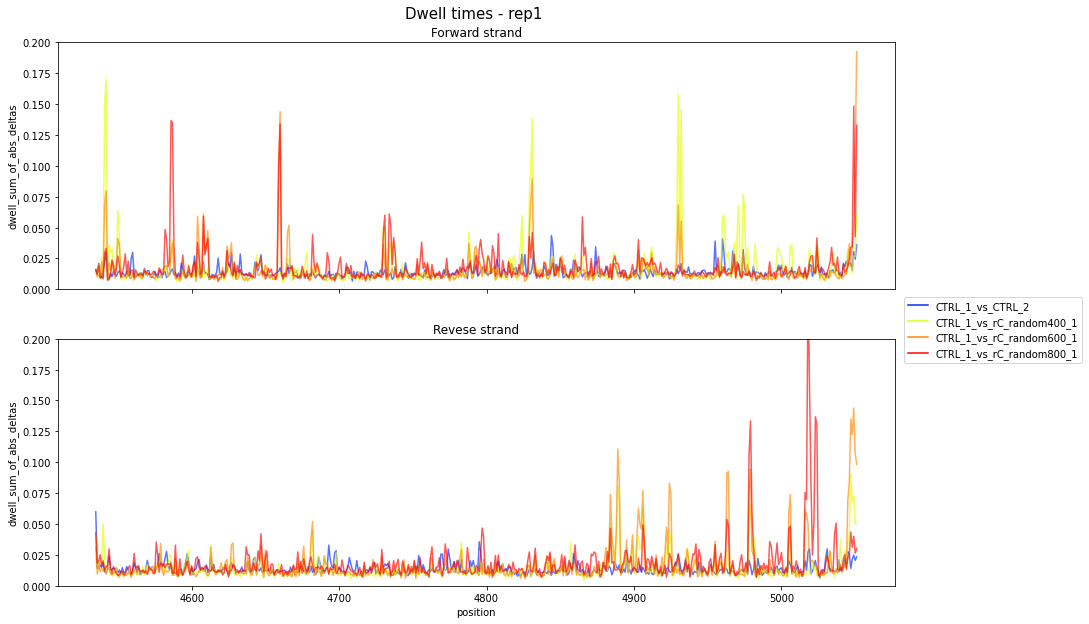

In [20]:
# plot new version for dwell times
colors = dict(CTRL_1_vs_CTRL_2="#002BFF", CTRL_1_vs_rC_random400_1="#E0FF00", CTRL_1_vs_rC_random600_1="#FF8700", CTRL_1_vs_rC_random800_1="#FF0000")
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,10), sharex=True)
sn.lineplot(data=diffs_total.query("strand == '+'"), x="position", y="dwell_sum_of_abs_deltas", hue="comparison", ax=axes[0], alpha=0.65, palette=colors)
sn.lineplot(data=diffs_total.query("strand == '-'"), x="position", y="dwell_sum_of_abs_deltas", hue="comparison", ax=axes[1], alpha=0.65, palette=colors)
axes[0].set_ylim(0, 0.2)
axes[1].set_ylim(0, 0.2)
axes[1].get_legend().remove()
axes[0].legend(bbox_to_anchor=(1.23, -0.01))

f.suptitle("Dwell times - rep1", size=15, x=0.51, y=0.93)
axes[0].set_title("Forward strand")
axes[1].set_title("Revese strand")

save_path = os.path.join(results_folderpath, f"dwelltimes_sum_of_diffs_whole_stats_rC_whole_region_rep1.tiff")
plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white', transparent=False)

plt.show()